##What to do?

--Clean up. Leave comments!

In [21]:
import scipy.optimize as optimize
#import scipy.misc as sm
#import scipy.ndimage as ndimage
from matplotlib.colors import LogNorm
import pyfits, os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
ImgDir = '/Users/jliburd/Dropbox/swift/Jamar_Liburd/work/grb05052b/'
os.chdir(ImgDir)

In [101]:
hdulist_img = pyfits.open('all_energy_WT.img')
hdulist_img.info()
ImgData = hdulist_img[0].data
RollAngle = hdulist_img[0].header['PA_PNT']
hdulist_img.close

Filename: all_energy_WT.img
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU     414   (1000, 1000)   int32   
1    GTI         BinTableHDU     51   433R x 2C    [1D, 1D]   


<bound method HDUList.close of [<pyfits.hdu.image.PrimaryHDU object at 0x111877810>, <pyfits.hdu.table.BinTableHDU object at 0x10b2b3350>]>

4663

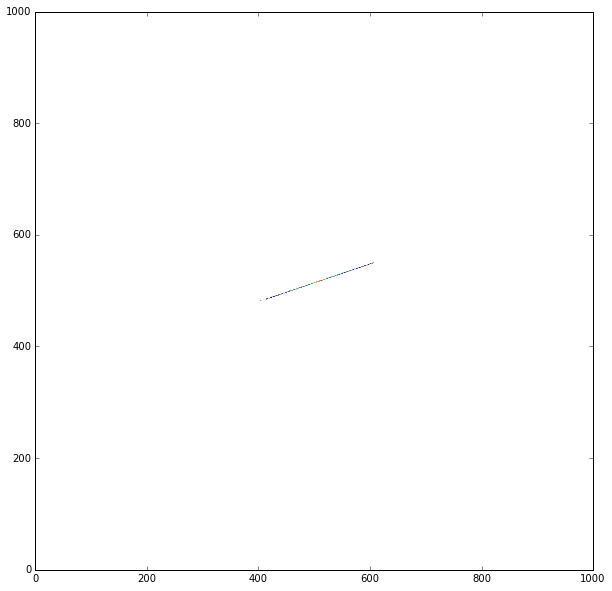

In [102]:
plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='white', edgecolor='k')
plt.imshow(ImgData, norm=LogNorm(), cmap='spectral', origin="lower")
np.where(ImgData <0)
np.max(ImgData)

In [103]:
collapsed_ImgData =ImgData.sum(axis=0)
xaxes = np.arange(len(collapsed_ImgData))

(450, 550)

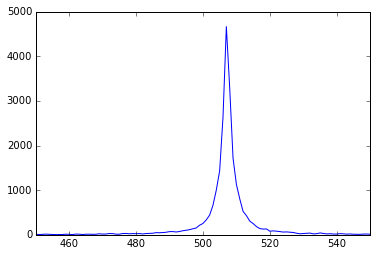

In [104]:
plt.plot(collapsed_ImgData)
plt.xlim(450,550)

(450, 520)

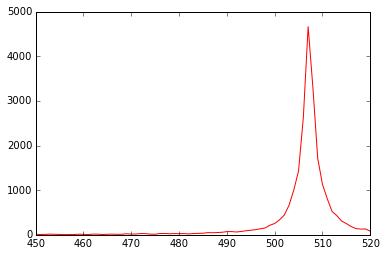

In [105]:
plt.plot(collapsed_ImgData,'r')
plt.xlim(450,520)

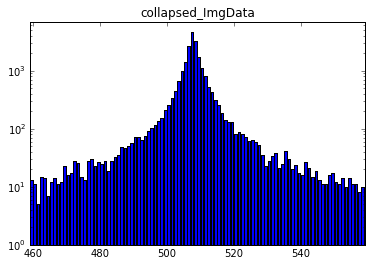

In [106]:
plt.bar(xaxes, collapsed_ImgData)
#plt.xlim(423,543)
plt.xlim(459,559)
plt.ylim(1,1.5*np.max(collapsed_ImgData))
plt.title('collapsed_ImgData')
plt.yscale('log')

In [107]:
np.where(collapsed_ImgData==max(collapsed_ImgData))

(array([507]),)

In [108]:
import math
angle_scaling_factor = math.cos((RollAngle-270)*math.pi/180.0)
angle_scaling_factor

0.9473043676987477

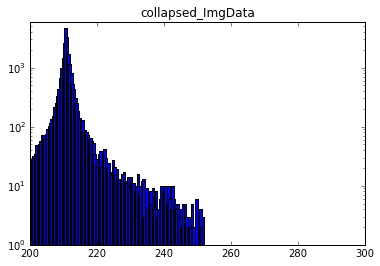

In [109]:
tcdlt = 6.5480890872090E-04
plt.bar((xaxes)*tcdlt*(60)*10/angle_scaling_factor, collapsed_ImgData)
plt.xlim(200,300)
plt.ylim(1,6000)
plt.title('collapsed_ImgData')
plt.yscale('log')

In [110]:
"""print np.where(error==0)
shifted_xaxes[92]"""

'print np.where(error==0)\nshifted_xaxes[92]'

In [111]:
"""theta = 0
E = 5 #kev/0.1
rc = aa2 + bb2 * theta + cc2 * E + dd2 * E * theta
beta = aa3 + bb3 * theta + cc3 * E + dd3 * E * theta"""

'theta = 0\nE = 5 #kev/0.1\nrc = aa2 + bb2 * theta + cc2 * E + dd2 * E * theta\nbeta = aa3 + bb3 * theta + cc3 * E + dd3 * E * theta'

In [112]:
"""print rc"""

'print rc'

In [113]:
"""shifted_xaxes1 = (np.arange(len(shifted_collapsed_ImgData))- (len(shifted_collapsed_ImgData)/2))"""

'shifted_xaxes1 = (np.arange(len(shifted_collapsed_ImgData))- (len(shifted_collapsed_ImgData)/2))'

In [114]:
plt.imshow?

This is the rc 2.30531563016
This is beta 1.51406342024
Dataset               = 1
Method                = levmar
Statistic             = chi2
Initial fit statistic = 183890
Final fit statistic   = 55622 at function evaluation 161
Data points           = 100
Degrees of freedom    = 96
Probability [Q-value] = 0
Reduced statistic     = 579.396
Change in statistic   = 128268
   PSFGBM2.theta   0           
   PSFGBM2.energy   100         
   PSFGBM2.amp    4663        
   PSFGBM2.center   0.112722    


INFO:sherpa.astro.ui.utils:Dataset               = 1
Method                = levmar
Statistic             = chi2
Initial fit statistic = 183890
Final fit statistic   = 55622 at function evaluation 161
Data points           = 100
Degrees of freedom    = 96
Probability [Q-value] = 0
Reduced statistic     = 579.396
Change in statistic   = 128268
   PSFGBM2.theta   0           
   PSFGBM2.energy   100         
   PSFGBM2.amp    4663        
   PSFGBM2.center   0.112722    


(-345.641, 33.629, 4666.21)

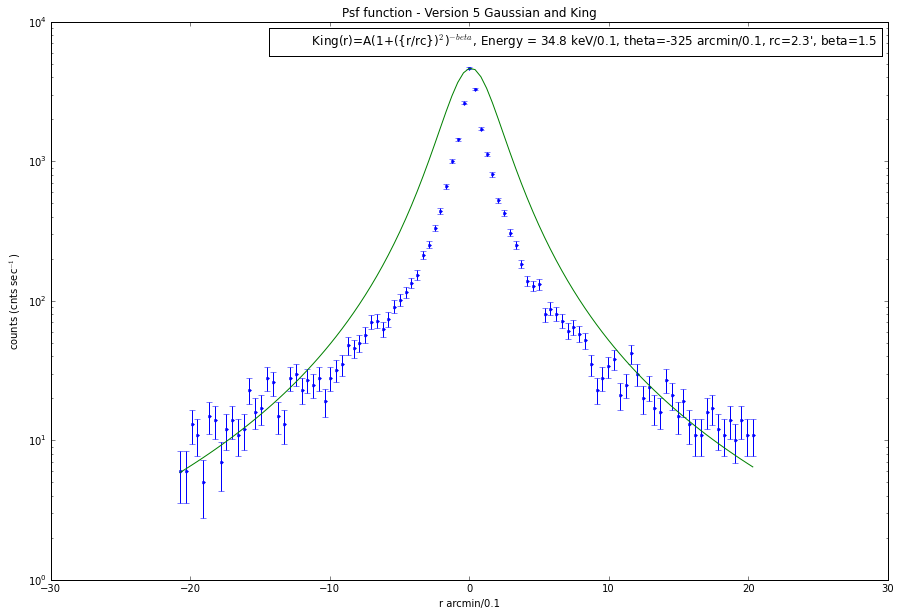

In [115]:
from sherpa.astro.ui import * ##line only necessary in native (i)Python, unnecessary in a Sherpa environment
from Kings_function_v2 import *

tcdlt = 6.5480890872090E-04 #deg/pixel
shifted_collapsed_ImgData = collapsed_ImgData[457:557]#-np.average(collapsed_BkgImgData[424:441])
shifted_xaxes = (np.arange(len(shifted_collapsed_ImgData))- (len(shifted_collapsed_ImgData)/2))*tcdlt*(60)*10/angle_scaling_factor #60 arcmin/degree * 10
error=shifted_collapsed_ImgData**(1.0/2)
#error[np.where(error==0)]=np.nan

import pyfits
swiftCALDB = '/Users/dmorris/CALDB/data/swift/xrt/cpf/psf/swxpsf20010101v005.fits'
hdulist_swiftCALDB = pyfits.open(swiftCALDB)
#hdulist_swiftCALDB.info()
P0 = hdulist_swiftCALDB[2].data[0]
P1 = hdulist_swiftCALDB[2].data[1]
P2 = hdulist_swiftCALDB[2].data[2]
P3 = hdulist_swiftCALDB[2].data[3]
hdulist_swiftCALDB.close()

aa0 = P0[1]
bb0 = P0[2]
cc0 = P0[3]
dd0 = P0[4]

aa1 = P1[1]
bb1 = P1[2]
cc1 = P1[3]
dd1 = P1[4]

aa2 = P2[1]
bb2 = P2[2]
cc2 = P2[3]
dd2 = P2[4]

aa3 = P3[1]
bb3 = P3[2]
cc3 = P3[3]
dd3 = P3[4]

theta = 0
E = 50 #kev/0.1
rc = aa2 + bb2 * theta + cc2 * E + dd2 * E * theta
beta = aa3 + bb3 * theta + cc3 * E + dd3 * E * theta
print "This is the rc",rc
print "This is beta",beta
load_arrays(1, shifted_xaxes,shifted_collapsed_ImgData,error)

load_user_model(PSF_Ground_Simplify, "PSFGBM2")
add_user_pars("PSFGBM2", ["a0","b0","c0","d0","a1","b1","c1","d1","a2","b2","c2","d2","a3","b3","c3","d3","theta","energy","amp","center"])


set_model(1,model=PSFGBM2)

set_par(PSFGBM2.a0, val=aa0)
set_par(PSFGBM2.b0, val=bb0)
set_par(PSFGBM2.c0, val=cc0)
set_par(PSFGBM2.d0, val=dd0)

set_par(PSFGBM2.a1, val=aa1)
set_par(PSFGBM2.b1, val=bb1)
set_par(PSFGBM2.c1, val=cc1) 
set_par(PSFGBM2.d1, val=dd1)

set_par(PSFGBM2.a2, val=aa2)
set_par(PSFGBM2.b2, val=bb2)
set_par(PSFGBM2.c2, val=cc2)
set_par(PSFGBM2.d2, val=dd2)

set_par(PSFGBM2.a3, val=aa3)
set_par(PSFGBM2.b3, val=bb3)
set_par(PSFGBM2.c3, val=cc3) 
set_par(PSFGBM2.d3, val=dd3)

set_par(PSFGBM2.theta, val=5, min=0)
set_par(PSFGBM2.energy, val=30, min=0, max=100) #kev/0.1
set_par(PSFGBM2.amp, val=np.max(shifted_collapsed_ImgData)*1.5,min=np.max(shifted_collapsed_ImgData))
set_par(PSFGBM2.center, val=0)

freeze(PSFGBM2.a2,PSFGBM2.a3,PSFGBM2.b2,PSFGBM2.b3,PSFGBM2.c2,PSFGBM2.c3,PSFGBM2.d2,PSFGBM2.d3)
freeze(PSFGBM2.a0,PSFGBM2.a1,PSFGBM2.b0,PSFGBM2.b1,PSFGBM2.c0,PSFGBM2.c1,PSFGBM2.d0,PSFGBM2.d1)
#freeze(PSFGBM2.theta)
#freeze(PSFGBM2.theta,PSFGBM2.energy)
"""
#ignore(0.2)
ignore("-20:-19")
ignore("1:4")
ignore("12.9:13.9")
ignore("20.5:21")"""

set_ylog()
fit(1)

plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='white', edgecolor='k')
plot_fit(1)
#plot_data()
plt.title("Psf function - Version 5 Gaussian and King")
plt.xlabel('r arcmin/0.1')
plt.ylabel('counts (cnts sec$^{-1}$)')
#plt.legend(['PSF = P0*Gauss(P1) + (1-P0)*King(P2,P3)'])
plt.legend([' King(r)=A(1+({r/rc})$^{2}$)$^{-beta}$, Energy = 34.8 keV/0.1, theta=-325 arcmin/0.1, rc=2.3\', beta=1.5'])
plt.savefig('PSF_Function_Fitting_v5_thawed_parameters.jpeg')


-345.641,33.629,4666.21

In [116]:
np.where(error==0)

(array([], dtype=int64),)

In [117]:
shifted_xaxes[57]

2.9031824516007827

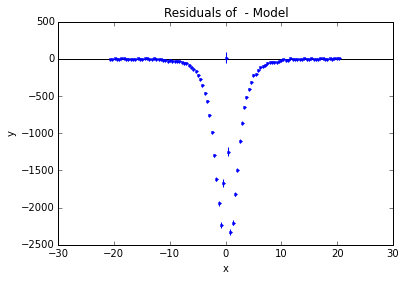

In [118]:
plot_resid()
plt.yscale('linear')

In [119]:
 #print(get_fit_plot(1))

In [120]:
"""plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='white', edgecolor='k')
plot_resid(1)
plt.yscale('linear')"""

"plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='white', edgecolor='k')\nplot_resid(1)\nplt.yscale('linear')"

In [121]:
parameters=[aa0,bb0,cc0,dd0,aa1,bb1,cc1,dd1,aa2,bb2,cc2,dd2,aa3,bb3,cc3,dd3,-324.579,32.5196,657.9,0.136575 ]
#parameters=[aa0,bb0,cc0,dd0,aa1,bb1,cc1,dd1,aa2,bb2,cc2,dd2,aa3,bb3,cc3,dd3,-329.593,32.2487,800,0.4 ]

#plt.xlim(459,559)
#shifted_collapsed_reversed_ImgData = (collapsed_ImgData[394:454])[::-1]

shifted_collapsed_reversed_ImgData = (collapsed_ImgData[459:559])[::-1]
shifted_collapsed_ImgData.max()
shifted_collapsed_reversed_ImgData.max()

4663

In [122]:
tcdlt = 6.5480890872090E-04 #deg/pixel
shifted_collapsed_ImgData = collapsed_ImgData[453:513]#-np.average(collapsed_BkgImgData[424:441])
shifted_xaxes = (np.arange(len(shifted_collapsed_ImgData))- (len(shifted_collapsed_ImgData)/2))*tcdlt*(60)*10/angle_scaling_factor #60 arcmin/degree * 10
error=shifted_collapsed_ImgData**(1.0/2)
#error[np.where(error==0)]=np.nan

In [123]:
error.shape

(60,)

In [124]:
shifted_collapsed_ImgData = collapsed_ImgData[459:559]#-np.average(collapsed_BkgImgData[424:441])
shifted_xaxes = (np.arange(len(shifted_collapsed_ImgData))- (len(shifted_collapsed_ImgData)/2))*tcdlt*(60)*10/angle_scaling_factor #60 arcmin/degree * 10
error=shifted_collapsed_ImgData**(1.0/2)

In [125]:
np.where(collapsed_ImgData==collapsed_ImgData.max())

(array([507]),)

In [126]:
507+50

557

In [127]:
2.0*60/10

12.0

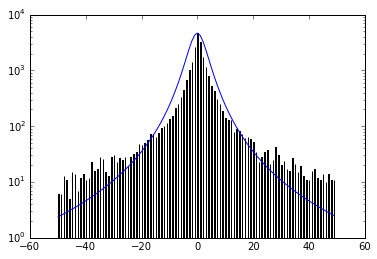

In [128]:
#plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='white', edgecolor='k')
tcdlt = 6.5480890872090E-04 #deg/pixel
shifted_collapsed_ImgData = collapsed_ImgData[457:557]#-np.average(collapsed_BkgImgData[424:441])
shifted_xaxes = (np.arange(len(shifted_collapsed_ImgData))- (len(shifted_collapsed_ImgData)/2))*tcdlt*(3600)/2.36 #60 arcmin/degree * 10
error=shifted_collapsed_ImgData**(1/2)
#shifted_collapsed_reversed_ImgData = np.fliplr(collapsed_ImgData[407:507])


rc = 4 #arcs
beta = 1.5
r = shifted_xaxes
amplitude = np.max(collapsed_ImgData)
King_test = amplitude*((1+(r/rc)**2))**(-beta)


plt.bar(shifted_xaxes,shifted_collapsed_ImgData,width=0.2)
#plt.plot(shifted_xaxes,PSF_Ground_Simplify(parameters,shifted_xaxes),'r')
plt.plot(shifted_xaxes,King_test)
plt.yscale('log')

In [129]:
image_data()

In [130]:
np.where(collapsed_ImgData ==collapsed_ImgData.max())

(array([507]),)

In [131]:
dd2

0.00025294401

Dataset               = 1
Method                = levmar
Statistic             = chi2
Initial fit statistic = 23431
Final fit statistic   = 3140.68 at function evaluation 6
Data points           = 100
Degrees of freedom    = 99
Probability [Q-value] = 0
Reduced statistic     = 31.7241
Change in statistic   = 20290.3
   Moretti_Test_King.amp   4280.26     


INFO:sherpa.astro.ui.utils:Dataset               = 1
Method                = levmar
Statistic             = chi2
Initial fit statistic = 23431
Final fit statistic   = 3140.68 at function evaluation 6
Data points           = 100
Degrees of freedom    = 99
Probability [Q-value] = 0
Reduced statistic     = 31.7241
Change in statistic   = 20290.3
   Moretti_Test_King.amp   4280.26     


(0.1, 100000)

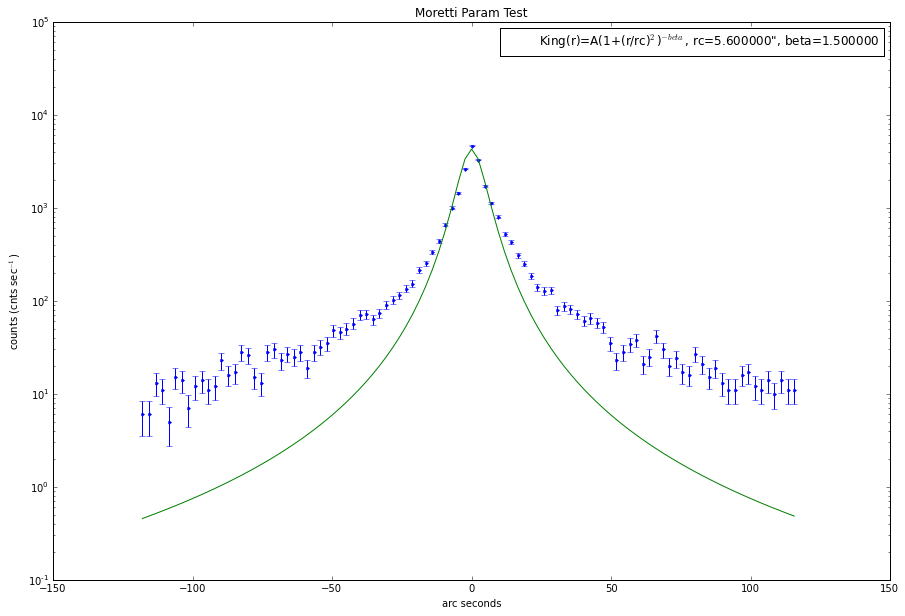

In [135]:
from sherpa.astro.ui import * ##line only necessary in native (i)Python, unnecessary in a Sherpa environment
from Kings_function_v2 import *

tcdlt = 6.5480890872090E-04 #deg/pixel
shifted_collapsed_ImgData = collapsed_ImgData[457:557]#-np.average(collapsed_BkgImgData[424:441])
shifted_xaxes = (np.arange(len(shifted_collapsed_ImgData))- (len(shifted_collapsed_ImgData)/2))*2.36#*10/angle_scaling_factor #60 arcmin/degree * 10
error=shifted_collapsed_ImgData**(1.0/2)
error[np.where(error==0)]=np.nan

def Moretti_Test_King(pars,x):      
    return pars[2]*((((1+(x/(pars[0]))**2)))**(-1*pars[1]))

load_arrays(1, shifted_xaxes,shifted_collapsed_ImgData,error)

load_user_model(Moretti_Test_King, "Moretti_Test_King")
add_user_pars("Moretti_Test_King", ["rc","beta","amp"])


set_model(1,model=Moretti_Test_King)

TESTrc = 5.6
TESTbeta = 1.5
set_par(Moretti_Test_King.rc, val=TESTrc, min=0)
set_par(Moretti_Test_King.beta, val=TESTbeta)
set_par(PSFGBM2.amp, val=np.max(shifted_collapsed_ImgData)*1.5)
freeze(Moretti_Test_King.beta,Moretti_Test_King.rc)

set_ylog()
fit(1)
show_fit()

plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='white', edgecolor='k')
plot_fit(1)
#plot_data()
plt.title("Moretti Param Test")
plt.xlabel('arc seconds')
plt.ylabel('counts (cnts sec$^{-1}$)')
label = 'King(r)=A(1+(r/rc)$^{2}$)$^{-beta}$, rc=%f\", beta=%f' %(TESTrc,TESTbeta)
plt.legend([label])
plt.ylim(0.1,100000)
#plt.savefig('Moretti_Param_test_thawed_parameters.jpeg')


In [170]:
10**0.6989700043360189

5.000000000000001

In [173]:
from math import log

In [205]:
A=4280.26 
r=500
rc=5.6
beta=1.5
K = A*((1+(r/rc)**2))**(-beta)

In [206]:
x=(1+(r/rc)**2)
beta_check = log(x,(K/A))*-1
print beta_check

0.666666666667


In [207]:
x = (1+(r/rc)**2)
beta_check = log(x)-log(K)

In [166]:
beta_check

0.636487326062295

4.0

In [233]:
label = 'King(r)=A(1+({r/rc})$^{2}$)$^{-beta}$, rc=%f, beta=%f' %(rc,beta)
print label

King(r)=A(1+({r/rc})$^{2}$)$^{-beta}$, rc=4.000000, beta=1.500000


In [234]:
shifted_xaxes

array([-118.  , -115.64, -113.28, -110.92, -108.56, -106.2 , -103.84,
       -101.48,  -99.12,  -96.76,  -94.4 ,  -92.04,  -89.68,  -87.32,
        -84.96,  -82.6 ,  -80.24,  -77.88,  -75.52,  -73.16,  -70.8 ,
        -68.44,  -66.08,  -63.72,  -61.36,  -59.  ,  -56.64,  -54.28,
        -51.92,  -49.56,  -47.2 ,  -44.84,  -42.48,  -40.12,  -37.76,
        -35.4 ,  -33.04,  -30.68,  -28.32,  -25.96,  -23.6 ,  -21.24,
        -18.88,  -16.52,  -14.16,  -11.8 ,   -9.44,   -7.08,   -4.72,
         -2.36,    0.  ,    2.36,    4.72,    7.08,    9.44,   11.8 ,
         14.16,   16.52,   18.88,   21.24,   23.6 ,   25.96,   28.32,
         30.68,   33.04,   35.4 ,   37.76,   40.12,   42.48,   44.84,
         47.2 ,   49.56,   51.92,   54.28,   56.64,   59.  ,   61.36,
         63.72,   66.08,   68.44,   70.8 ,   73.16,   75.52,   77.88,
         80.24,   82.6 ,   84.96,   87.32,   89.68,   92.04,   94.4 ,
         96.76,   99.12,  101.48,  103.84,  106.2 ,  108.56,  110.92,
        113.28,  115

In [235]:
np.where(shifted_collapsed_ImgData==shifted_collapsed_ImgData.max())

(array([50]),)

In [236]:
len(shifted_collapsed_ImgData)

100